In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
class SmartGridEnv:
    def __init__(self, num_states=5, num_actions=3):
        self.num_states = num_states  # Different load levels
        self.num_actions = num_actions  # Actions to balance load
        self.state = random.randint(0, num_states - 1)  # Random initial state

    def step(self, action):
        # Define reward based on action taken
        if action == 0:  # Reduce load
            reward = -abs(self.state - 1)  # Closer to optimal (state=2)
        elif action == 1:  # Maintain load
            reward = -abs(self.state - 2)
        else:  # Increase load
            reward = -abs(self.state - 3)

        # Update state based on action
        self.state = min(max(self.state + (action - 1), 0), self.num_states - 1)

        return self.state, reward

    def reset(self):
        self.state = random.randint(0, self.num_states - 1)
        return self.state

In [3]:
num_states = 5
num_actions = 3
Q_table = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation tradeoff

env = SmartGridEnv(num_states, num_actions)

In [4]:
num_episodes = 500
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for _ in range(10):  # Limit steps per episode
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, num_actions - 1)  # Explore
        else:
            action = np.argmax(Q_table[state])  # Exploit

        next_state, reward = env.step(action)

        # Q-Learning update rule
        Q_table[state, action] = (1 - alpha) * Q_table[state, action] + \
                                  alpha * (reward + gamma * np.max(Q_table[next_state]))

        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)

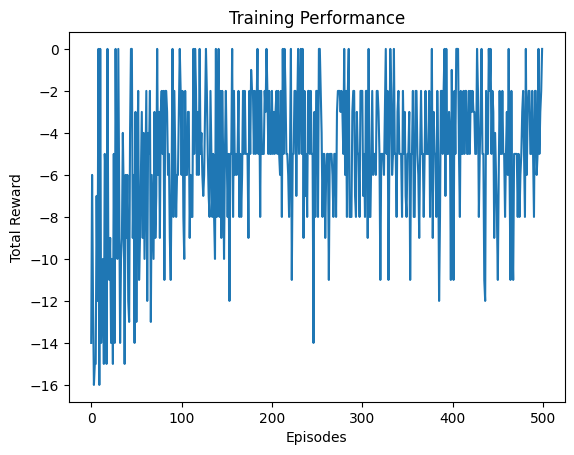

In [5]:
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Performance')
plt.show()

In [6]:
def evaluate_agent(env, Q_table, num_trials=10):
    total_rewards = []
    for _ in range(num_trials):
        state = env.reset()
        total_reward = 0
        for _ in range(10):
            action = np.argmax(Q_table[state])
            state, reward = env.step(action)
            total_reward += reward
        total_rewards.append(total_reward)
    return np.mean(total_rewards)

eval_score = evaluate_agent(env, Q_table)
print(f'Average Reward after Training: {eval_score}')

Average Reward after Training: -3.3


In [8]:
np.save("q_table.npy", Q_table)  # Save the trained Q-table